<a href="https://colab.research.google.com/github/lamtranBKHN/MAIT_2020_LabMemberDectector/blob/origin/MAIT_2020_Model_Training_VGG16_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten

IMG_SIZE = 50

In [2]:

data_dir = '/content/drive/MyDrive/Sample_data_31.12_augmentated'
print(os.listdir(data_dir))

['THHoang_181888', 'THGiang_192200', 'Thanh_Quang', 'TDPhu_181692', 'Phuong_Anh', 'PGPhong_181691', 'NVMinh_174064', 'NVLinh_181579', 'NTTung_181828', 'NTHLy_181637', 'NTHai_173821', 'NTCong_179626', 'NQThai_192002', 'NQAnh_181325', 'NNHoang_181492', 'Nguyen_Thi_Huong', 'Nguyen_Ba_Hoang', 'NDToan_174273', 'NDQuan_192034', 'NDHuy_161823', 'NBHoang_181486', 'LTHien_173846', 'LDTAnh_181320', 'KTAnh_176917', 'HDTuan_192259', 'DPDuong_181432', 'DLTMy_200426', 'DADung_181421', 'CQDat_181383', 'Bui_Quang_Duy', 'VVHung_192210', 'VCThinh_174239', 'TVThai_181749', 'TVSon_181920', 'Tran_Thi_Thanh_Nhan', 'Tran_Minh_Thuyet', 'TQMinh_181659', 'Toan']


In [3]:

# num_skipped = 0

# for fname in os.listdir(data_dir):
#   print("Processing " + fname + " ... ")
#   personal_img_path = os.path.join(data_dir, fname) 
#   for fname in os.listdir(personal_img_path):
#     fpath = os.path.join(personal_img_path, fname)
#     try:
#         fobj = open(fpath, "rb")
#         is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
#     finally:
#         fobj.close()

#     if not is_jfif:
#         num_skipped += 1
#         # Delete corrupted image
#         os.remove(fpath)

# print("Deleted %d images" % num_skipped)

In [4]:
image_size = (IMG_SIZE, IMG_SIZE)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 4356 files belonging to 38 classes.
Using 3485 files for training.
Found 4356 files belonging to 38 classes.
Using 871 files for validation.


In [5]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

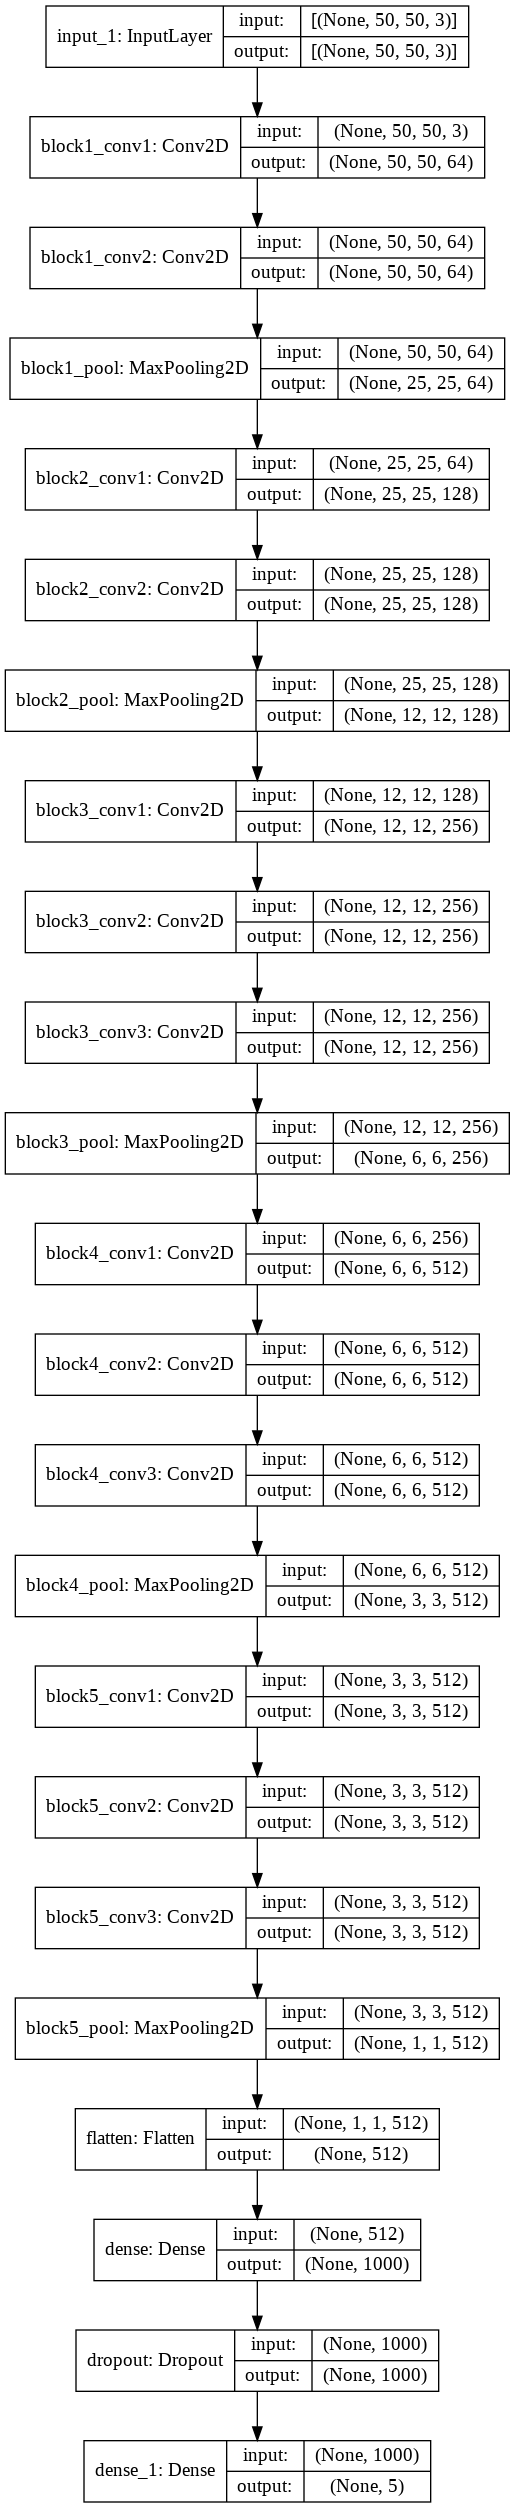

In [6]:
#from keras.utils import to_categorical
#y = to_categorical(y)
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected lay
baseModel = VGG16(weights='imagenet', include_top=False, \
                  input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))
# Buil layer
fcHead = baseModel.output
# Flatten 
fcHead = Flatten()(fcHead)
# Add FC
fcHead = Dense(1000, activation='relu')(fcHead)
fcHead = Dropout(0.5)(fcHead)
# Output layer with softmax activation
fcHead = Dense(5, activation='softmax')(fcHead)
# modle
model = model = Model(inputs=baseModel.input, outputs=fcHead)
keras.utils.plot_model(model, show_shapes=True)

In [7]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="binary_crossentropy",
#     metrics=["accuracy"],
# )
model.compile(loss = "sparse_categorical_crossentropy", 
                    optimizer = SGD(lr=1e-5, momentum=0.9), 
                    metrics=["accuracy"])
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
109/109 [==============================] - 243s 2s/step - loss: nan - accuracy: 0.0202 - val_loss: nan - val_accuracy: 0.0138
Epoch 2/50
109/109 [==============================] - 14s 128ms/step - loss: nan - accuracy: 0.0213 - val_loss: nan - val_accuracy: 0.0138
Epoch 3/50
109/109 [==============================] - 15s 133ms/step - loss: nan - accuracy: 0.0218 - val_loss: nan - val_accuracy: 0.0138
Epoch 4/50
109/109 [==============================] - 15s 135ms/step - loss: nan - accuracy: 0.0195 - val_loss: nan - val_accuracy: 0.0138
Epoch 5/50
109/109 [==============================] - 16s 140ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0138
Epoch 6/50
109/109 [==============================] - 16s 140ms/step - loss: nan - accuracy: 0.0216 - val_loss: nan - val_accuracy: 0.0138
Epoch 7/50
109/109 [==============================] - 16s 139ms/step - loss: nan - accuracy: 0.0194 - val_loss: nan - val_accuracy: 0.0138
Epoch 8/50
109/109 [=========